# Modal analysis of 3D velocity field

This script depends on the data produced by `naca0012_volume_modal_analysis.py`.

In [1]:
from os import makedirs
import numpy as np
import torch as pt
from scipy.signal import welch
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 160
plt.rc('text', usetex=True)

output = "./output/naca0012_analysis/"
makedirs(output, exist_ok=True)

In [15]:
outpath = "./output/naca0012_data/"
svd_s = pt.load(f"{outpath}svd_z50_sig.pt")
svd_V = pt.load(f"{outpath}svd_z50_V.pt")
times = pt.load(f"{outpath}times_z50.pt")

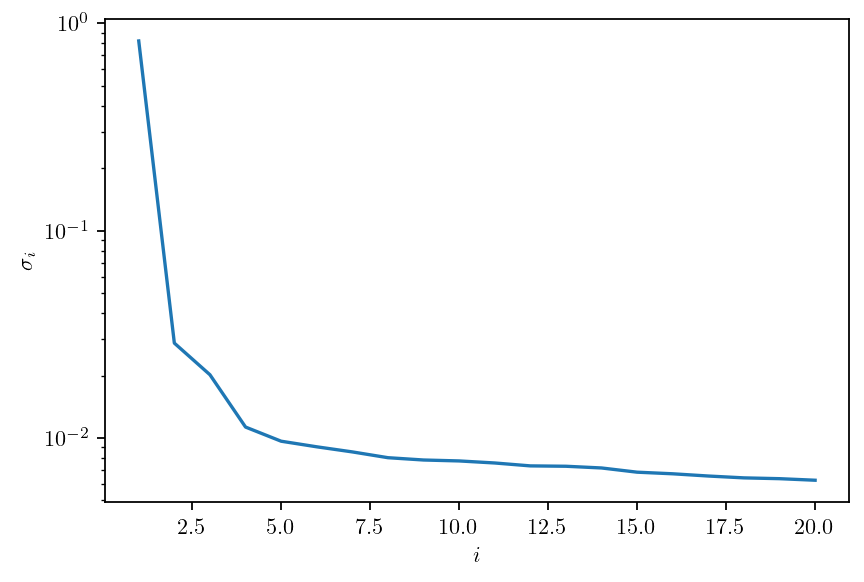

In [11]:
plt.plot(range(1, len(svd_s) + 1), svd_s/svd_s.sum())
plt.xlabel(r"$i$")
plt.ylabel(r"$\sigma_i$")
plt.yscale("log")
plt.show()

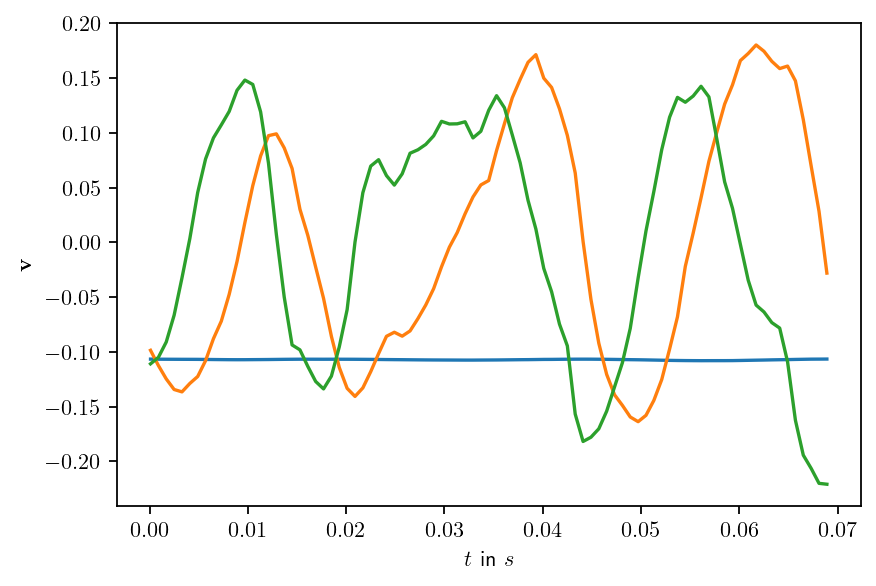

In [20]:
for i in range(3):
    plt.plot(times[:690:8], svd_V[:, i])
plt.xlabel(r"$t$ in $s$")
plt.ylabel(r"$\mathbf{v}$")
plt.show()

In [38]:
dt = (times[1] - times[0]).item() * 8
n_samples = times[:690:8].shape[0]

for i in range(10):
    f, a = welch(svd_V[:, i].numpy(), fs=1/dt, nperseg=n_samples, nfft=n_samples)
    amax = np.argmax(a),
    print(f"mode {i}:", f[amax], a[amax])
    print("-"*20)

mode 0: 43.103449364746794 4.386184e-09
--------------------
mode 1: 43.103449364746794 0.00035957532
--------------------
mode 2: 43.103449364746794 0.000294404
--------------------
mode 3: 14.367816454915598 0.00023237905
--------------------
mode 4: 71.83908227457799 0.00030375397
--------------------
mode 5: 100.57471518440919 0.00024543962
--------------------
mode 6: 603.4482911064551 0.0002059977
--------------------
mode 7: 172.41379745898718 9.9819976e-05
--------------------
mode 8: 574.7126581966239 0.00017148648
--------------------
mode 9: 71.83908227457799 9.641439e-05
--------------------


In [27]:
dmd_f = pt.load(f"{outpath}dmd_z50_freq.pt")
dmd_imp = pt.load(f"{outpath}dmd_z50_int.pt")
dmd_eig = pt.load(f"{outpath}dmd_z50_eigvals.pt")

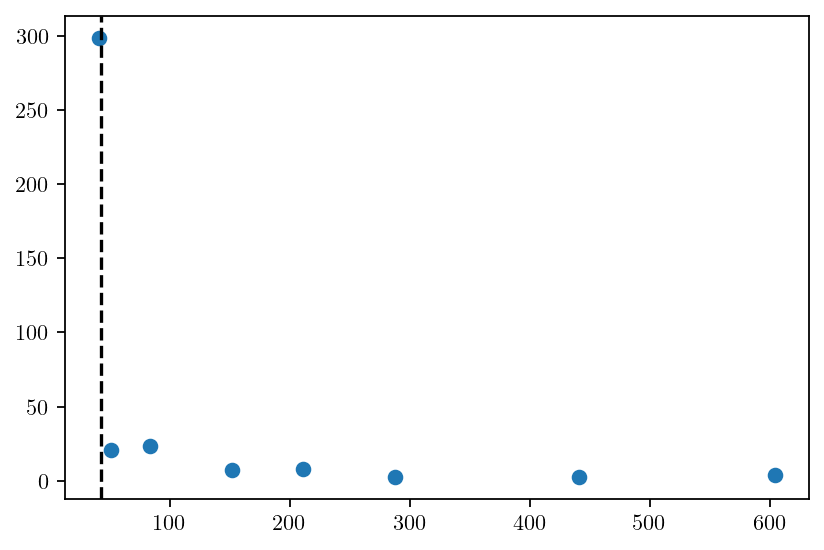

In [31]:
plt.scatter(dmd_f[dmd_f > 0], dmd_imp[dmd_f > 0])
plt.axvline(43, ls="--", c="k")
plt.show()

In [40]:
for i, (f, a) in enumerate(zip(dmd_f, dmd_imp)):
    print(i, f, a)

0 tensor(604.3863) tensor(3.5919)
1 tensor(-604.3863) tensor(3.5924)
2 tensor(440.9055) tensor(2.6630)
3 tensor(-440.9055) tensor(2.6594)
4 tensor(287.3534) tensor(2.7219)
5 tensor(-287.3534) tensor(2.7184)
6 tensor(211.2801) tensor(7.7406)
7 tensor(-211.2801) tensor(7.7355)
8 tensor(0.) tensor(1.9896)
9 tensor(151.6470) tensor(7.1979)
10 tensor(-151.6470) tensor(7.1893)
11 tensor(0.) tensor(13392.4199)
12 tensor(83.4188) tensor(23.4653)
13 tensor(-83.4188) tensor(23.4658)
14 tensor(40.7345) tensor(298.7102)
15 tensor(-40.7345) tensor(298.7091)
16 tensor(51.3582) tensor(20.8245)
17 tensor(-51.3582) tensor(20.8230)
18 tensor(0.) tensor(7.9579)


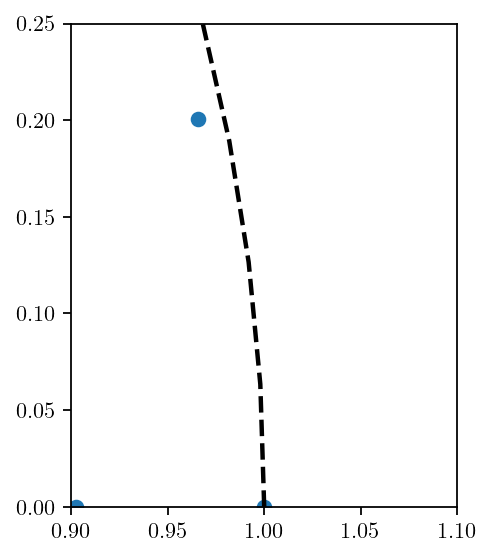

In [37]:
t = pt.linspace(0, 2 * np.pi, 100)
plt.plot(pt.cos(t), pt.sin(t), ls="--", color="k", lw=2)
plt.scatter(dmd_eig.real, dmd_eig.imag)
plt.gca().set_aspect("equal")
plt.xlim(0.9, 1.1)
plt.ylim(0, 0.25)
plt.show()